In [1]:
import pandas as pd

# Load the dataset
titanic_df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Display the first few rows of the dataset
print(titanic_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
# Check for missing values
print(titanic_df.isnull().sum())

# Impute missing values for 'Age' and 'Fare'
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Fare'].fillna(titanic_df['Fare'].median(), inplace=True)

# Drop 'Cabin' column due to too many missing values
titanic_df.drop('Cabin', axis=1, inplace=True)

# Drop rows with missing values in 'Embarked'
titanic_df.dropna(subset=['Embarked'], inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Create a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

# Create a new feature 'IsAlone' indicating whether the passenger was alone or not
titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1


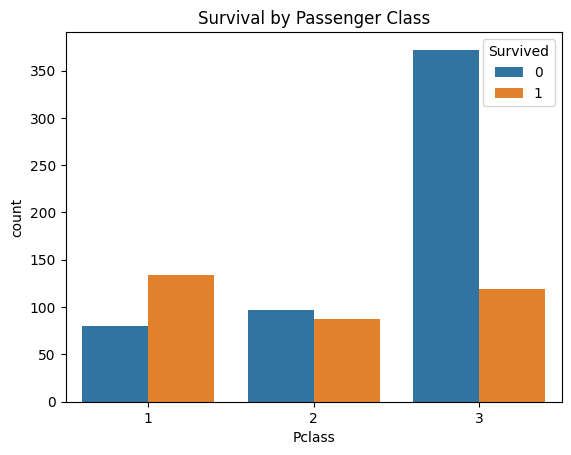

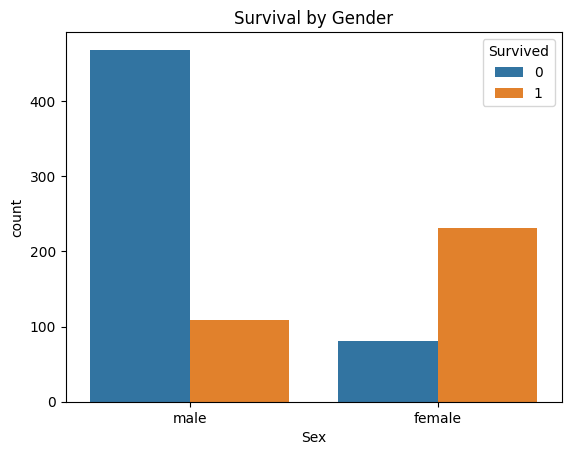

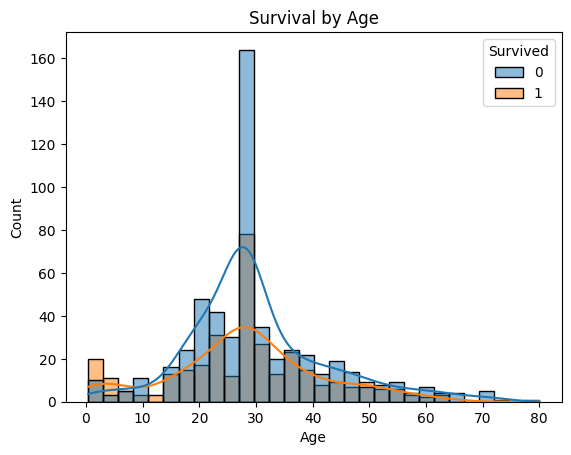

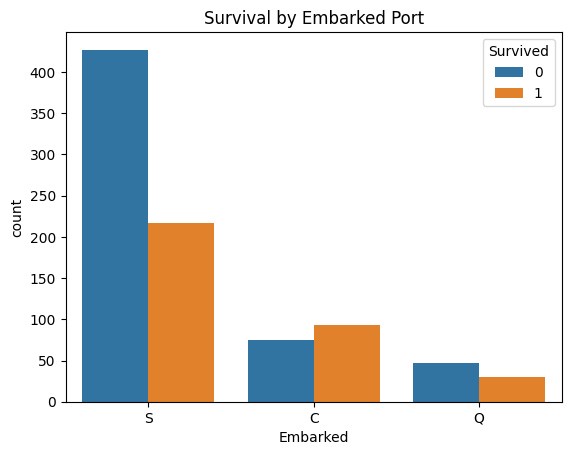

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relationship between survival and passenger class
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('Survival by Passenger Class')
plt.show()

# Relationship between survival and gender
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Survival by Gender')
plt.show()

# Relationship between survival and age
sns.histplot(x='Age', hue='Survived', data=titanic_df, kde=True)
plt.title('Survival by Age')
plt.show()

# Relationship between survival and embarked port
sns.countplot(x='Embarked', hue='Survived', data=titanic_df)
plt.title('Survival by Embarked Port')
plt.show()


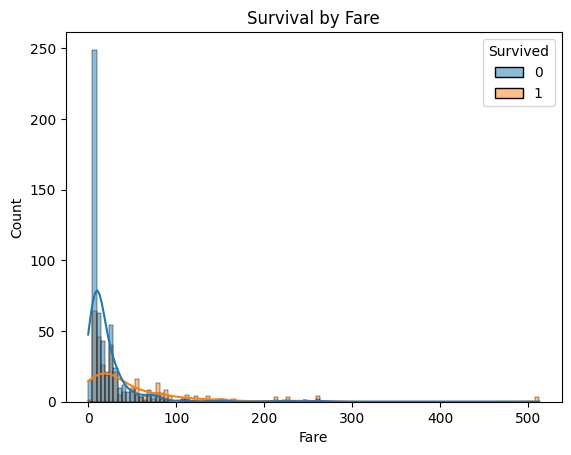

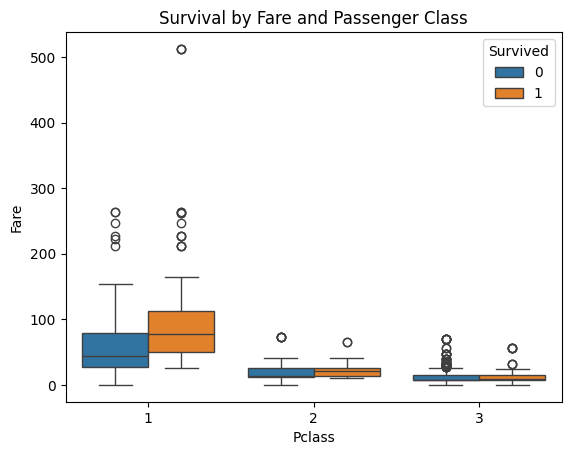

In [7]:
# Relationship between survival and fare
sns.histplot(x='Fare', hue='Survived', data=titanic_df, kde=True)
plt.title('Survival by Fare')
plt.show()

# Relationship between survival, fare, and passenger class
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=titanic_df)
plt.title('Survival by Fare and Passenger Class')
plt.show()


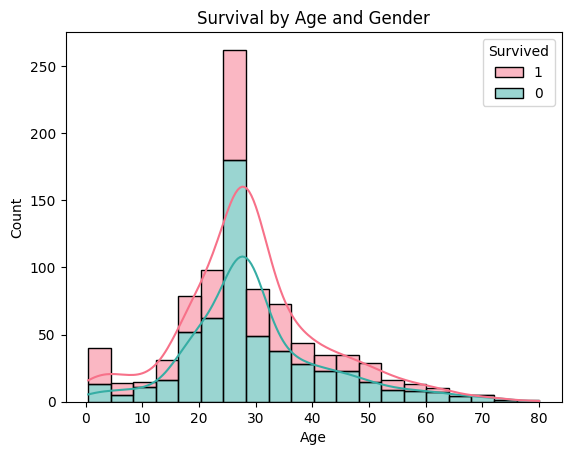

In [8]:
# Relationship between survival, age, and gender
sns.histplot(x='Age', hue='Survived', data=titanic_df, kde=True, multiple='stack', palette='husl', hue_order=[1,0], bins=20)
plt.title('Survival by Age and Gender')
plt.show()


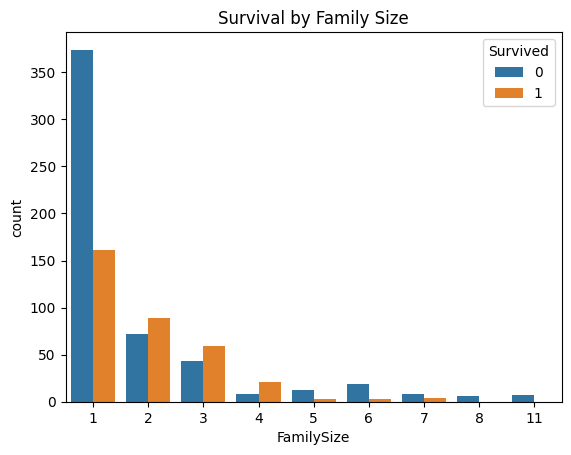

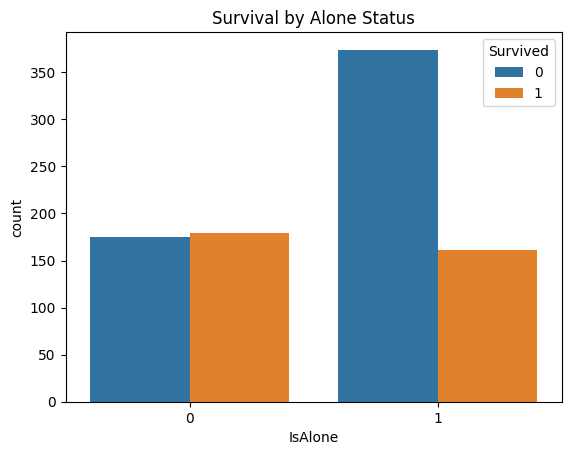

In [9]:
# Relationship between survival and family size
sns.countplot(x='FamilySize', hue='Survived', data=titanic_df)
plt.title('Survival by Family Size')
plt.show()

# Relationship between survival and alone status
sns.countplot(x='IsAlone', hue='Survived', data=titanic_df)
plt.title('Survival by Alone Status')
plt.show()
